In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Suppress FutureWarning about element-wise comparison to None
# Occurs when calling PSA plotting functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib as mpl
import MDAnalysis.analysis.rms as rms
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import pylab as pl
from matplotlib import collections  as mc

In [3]:
haus_strucs = []
    
get_pairs = glob.glob("PSA/PSAnalysisTutorial/*frame*.pdb")

haus_strucs.append(get_pairs)

mhp1 = mda.Universe("mhp1.psf", haus_strucs)
ag = mhp1.select_atoms("protein")
with mda.Writer("hpairs.dcd", ag.n_atoms) as W:
    for ts in mhp1.trajectory:
        W.write(ag)

In [4]:
haus_strucs

[['PSA/PSAnalysisTutorial/D6_frame_251.pdb',
  'PSA/PSAnalysisTutorial/D6_frame_257.pdb',
  'PSA/PSAnalysisTutorial/D6_frame_228.pdb',
  'PSA/PSAnalysisTutorial/D6_frame_57.pdb',
  'PSA/PSAnalysisTutorial/G3_frame_611.pdb',
  'PSA/PSAnalysisTutorial/G4_frame_516.pdb',
  'PSA/PSAnalysisTutorial/Fix4_frame_414.pdb',
  'PSA/PSAnalysisTutorial/Fix6_frame_180.pdb']]

## Scratch

In [5]:
h = mda.Universe("mhp1.psf", "hpairs.dcd")
pdbs = mda.Universe("mhp1.psf", "pdb_strucs.dcd")   

a1 = []
a2 = []
a3 = []

for hstruc in h.trajectory:

    b_ec = h.select_atoms("resid 38:40") #select bundle for ec_thin comparison
    ec_thin = h.select_atoms("resid 351:353") #select extracellular thin gate
    b_ic = h.select_atoms("resid 152:154") #sic
    ic_thin = h.select_atoms("resid 220:222") #select intracellular thin gate
    b_tg = h.select_atoms("resid 29 or resid 32") #sic
    thick = h.select_atoms("resid 300 or resid 303:304") #select thick gate

    a1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
    a2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
    a3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
    a1_b = np.linalg.norm(a1_a)
    a2_b = np.linalg.norm(a2_a)
    a3_b = np.linalg.norm(a3_a)

    a1.append(a1_b) #Ec_thin
    a2.append(a2_b) #Ic_thin
    a3.append(a3_b) #Thick Gate
    


In [6]:
h_1 = [] #This is a dirty way of getting the hausdorff pairs in order
h_2 = []
h_3 = [] 


for i in [3,7,4,8,2,5,1,6]:
     h_1.append(a1[i-1])
for i in [3,7,4,8,2,5,1,6]:
     h_2.append(a2[i-1])
for i in [3,7,4,8,2,5,1,6]:
     h_3.append(a3[i-1])
        
for i in [0,2,4,6]:
    print h_1[i:i+2]
    
    
        
h_1, h_2, h_3
    

[13.899530263295826, 16.378659687358851]
[7.9751636400733705, 8.7902752529376844]
[17.04747119035121, 11.136080005370479]
[17.156696236283008, 9.5837566205298312]


([13.899530263295826,
  16.378659687358851,
  7.9751636400733705,
  8.7902752529376844,
  17.04747119035121,
  11.136080005370479,
  17.156696236283008,
  9.5837566205298312],
 [11.732340883707334,
  11.634119874701485,
  17.464697645666625,
  12.832745681654604,
  11.837337114189504,
  11.47708782668705,
  11.507650886686536,
  11.420959534914568],
 [5.6257495220251172,
  5.8027282716081006,
  7.4705687332649759,
  5.4977772697183811,
  5.4858786368697663,
  5.5338828179417634,
  5.5679568106974031,
  5.7724596766789329])

In [7]:
h_1[1:]

[16.378659687358851,
 7.9751636400733705,
 8.7902752529376844,
 17.04747119035121,
 11.136080005370479,
 17.156696236283008,
 9.5837566205298312]

In [8]:
pdb_strucs = []
get_pairs = glob.glob("PSA/PSAnalysisTutorial/structs/*mini.crd")

pdb_strucs.append(get_pairs)

mhp1 = mda.Universe("mhp1.psf", pdb_strucs)
ag = mhp1.select_atoms("protein")
with mda.Writer("pdb_strucs.dcd", ag.n_atoms) as W:
    for ts in mhp1.trajectory:
        W.write(ag)

In [9]:
test = mda.Universe("mhp1.psf", "pdb_strucs.dcd")
len(test.trajectory)

3

In [29]:
def g2g(traj_bag, path_ID = "i2occ2o_TC", top = "mhp1.psf"):
    sns.set_style("ticks")
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
        
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    
    for traj in traj_bag:
        u = mda.Universe(top, traj)
        d1 = []
        d2 = []
        d3 = []
        
        for ts in u.trajectory:
            
            
            b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
            ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate
            b_ic = u.select_atoms("resid 152:154") #sic
            ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate
            b_tg = u.select_atoms("resid 29 or resid 32") #sic
            thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate

            d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
            d2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
            d3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
            d1_b = np.linalg.norm(d1_a)
            d2_b = np.linalg.norm(d2_a)
            d3_b = np.linalg.norm(d3_a)

            d1.append(d1_b) #Ec_thin
            d2.append(d2_b) #Ic_thin
            d3.append(d3_b) #Thick Gate
            
        ax1.plot(d3, d1, sns.xkcd_rgb["denim blue"], zorder=1)
        ax2.plot(d3, d2, sns.xkcd_rgb["steel blue"], zorder=1)
        
        ax1.plot(d3, d1, sns.xkcd_rgb["denim blue"], zorder=1)
        ax2.plot(d3, d2, sns.xkcd_rgb["steel blue"], zorder=1)

    
    D6_u = mda.Universe(top, traj_bag[0])
    D1=[]
    D2=[]
    D3=[]
    
    for ts in D6_u.trajectory:

        b_ec = D6_u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = D6_u.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = D6_u.select_atoms("resid 152:154") #sic
        ic_thin = D6_u.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = D6_u.select_atoms("resid 29 or resid 32") #sic
        thick = D6_u.select_atoms("resid 300 or resid 303:304") #select thick gate

        d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        d2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        d3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        d1_b = np.linalg.norm(d1_a)
        d2_b = np.linalg.norm(d2_a)
        d3_b = np.linalg.norm(d3_a)

        D1.append(d1_b) #Ec_thin
        D2.append(d2_b) #Ic_thin
        D3.append(d3_b) #Thick Gate
    
    ax1.plot(D3, D1, sns.xkcd_rgb["leaf green"], zorder=2, label = "Implicit Membrane")
    ax2.plot(D3, D2, sns.xkcd_rgb["moss"], zorder=2, label = "Implicit Membrane")
        
    h = mda.Universe(top, "hpairs.dcd")
    pdbs = mda.Universe(top, "pdb_strucs.dcd")   
        
    a1 = []
    a2 = []
    a3 = []
        
    for hstruc in h.trajectory:

        b_ec = h.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = h.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = h.select_atoms("resid 152:154") #sic
        ic_thin = h.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = h.select_atoms("resid 29 or resid 32") #sic
        thick = h.select_atoms("resid 300 or resid 303:304") #select thick gate

        a1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        a2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        a3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        a1_b = np.linalg.norm(a1_a)
        a2_b = np.linalg.norm(a2_a)
        a3_b = np.linalg.norm(a3_a)

        a1.append(a1_b) #Ec_thin
        a2.append(a2_b) #Ic_thin
        a3.append(a3_b) #Thick Gate
        
#         if i == 0:
#             ax1.scatter(a3, a1, c='r',zorder=3)
#         if i == 1:
#             ax1.scatter(a3, a1, c='g',zorder=3)
#         if i == 2:
#             ax1.scatter(a3, a1, c='w',zorder=3)




#     lines = [[(a2[2], a1[2]), (a2[5], a1[5])], [(a2[1], a1[1]), (a2[6], a1[6])], [(a2[3], a1[3]), (a2[7], a1[7])], [(a2[4], a1[4]), (a2[8], a1[8])]]

#     lc = mc.LineCollection(lines, colors='r', linewidths=2)
#     ax1.add_collection(lc)
#     ax2.add_collection(lc)

    h_1 = [] #This is a dirty way of getting the hausdorff pairs in order. Look here for bugs!
    h_2 = []
    h_3 = [] 


    for i in [3,7,4,8,2,5,1,6]:
         h_1.append(a1[i-1])
    for i in [3,7,4,8,2,5,1,6]:
         h_2.append(a2[i-1])
    for i in [3,7,4,8,2,5,1,6]:
         h_3.append(a3[i-1])

    for i in [0,2,4,6]:
        ax1.plot(a3[i:i+2], a1[i:i+2], c='r',zorder=3)
        ax2.plot(a3[i:i+2], a2[i:i+2], c='r',zorder=3)

    ax1.scatter(a3, a1, c='k', s=10, zorder=4)
    ax2.scatter(a3, a2, c='k', s=10, zorder=4)
    
    b1 = []
    b2 = []
    b3 = []

    for struc in pdbs.trajectory:


        b_ec = pdbs.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = pdbs.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = pdbs.select_atoms("resid 152:154") #sic
        ic_thin = pdbs.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = pdbs.select_atoms("resid 29 or resid 32") #sic
        thick = pdbs.select_atoms("resid 300 or resid 303:304") #select thick gate

        b1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        b2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        b3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        b1_b = np.linalg.norm(b1_a)
        b2_b = np.linalg.norm(b2_a)
        b3_b = np.linalg.norm(b3_a)

        b1.append(b1_b) #Ec_thin
        b2.append(b2_b) #Ic_thin
        b3.append(b3_b) #Thick Gate
        
    ax1.scatter(b3, b1, s=80, c='y', marker=(5, 1), zorder=2)
    ax2.scatter(b3, b2, s=80, c='y', marker=(5, 1), zorder=2)   
        
    
    sns.despine(fig1, right=True, top=True)
    
    ax1.set_title('Gate Space Comparison: Thick vs. EC', fontsize = '16')
    ax1.set_xlabel(r"Thick Gate Distance-to-bundle ($\AA$)")
    ax1.set_ylabel(r"EC Distance-to-bundle ($\AA$)")
    ax1.grid(False)
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    
    sns.despine(fig2, right=True, top=True)

    fig1.show()
    fig2.show()
    
    fig1.savefig("mhp1_EC_Th_g2g_" + path_ID + "_mhp1.pdf")
    fig2.savefig("mhp1_IC_Th_g2g_" + path_ID + "_mhp1.pdf")

In [20]:
data = []
test_dir = "PSA/PSAnalysisTutorial/fitted_trajs/"
for i in [6,9,10,16,18]:
    n = str(i)
    trajectory = '{}'.format(test_dir + "fitted_psa" + n.zfill(3) + ".dcd")
    data.append(os.path.abspath(trajectory))

In [21]:
data[0]

'/nfs/homes/tcolburn/Projects/Beckstein/Mhp1/simulations/dims/implicit_solvent/implicit_membrane/analysis/PSA/PSAnalysisTutorial/fitted_trajs/fitted_psa006.dcd'

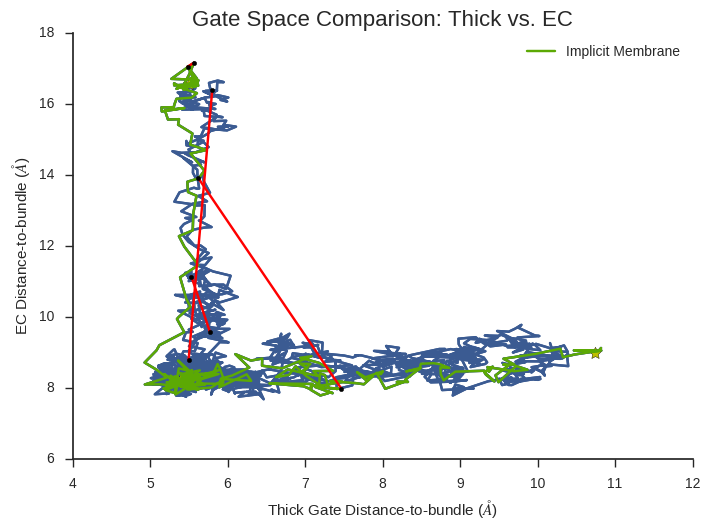

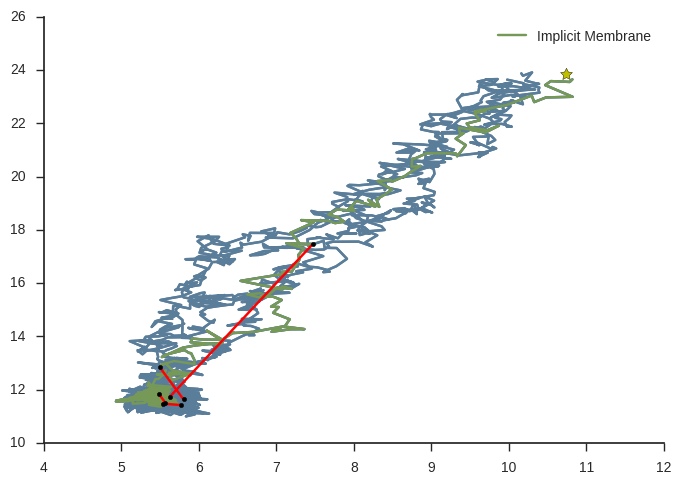

In [30]:
g2g(data)

In [13]:
'''from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def g2g_3D(traj_bag, path_ID = "i2occ2o_TC", top = "mhp1.psf"):
    sns.set_style("ticks")
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    
    for traj in traj_bag: # Trajectories
        u = mda.Universe(top, traj)
        d1 = []
        d2 = []
        d3 = []
        
        for ts in u.trajectory:
            
            
            b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
            ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate
            b_ic = u.select_atoms("resid 152:154") #sic
            ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate
            b_tg = u.select_atoms("resid 29 or resid 32") #sic
            thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate

            d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
            d2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
            d3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
            d1_b = np.linalg.norm(d1_a)
            d2_b = np.linalg.norm(d2_a)
            d3_b = np.linalg.norm(d3_a)

            d1.append(d1_b) # Ec_thin
            d2.append(d2_b) # Ic_thin
            d3.append(d3_b) # Thick Gate
            
        d1, d2, d3 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    d1=d1,
    d2=d2,
    d3=d3,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
        
    h = mda.Universe(top, "hpairs.dcd")
    pdbs = mda.Universe(top, "pdb_strucs.dcd")   
        
    a1 = []
    a2 = []
    a3 = []
        
    for hstruc in h.trajectory: # Hausdorff Pairs

        b_ec = h.select_atoms("resid 38:40") # select bundle for ec_thin comparison
        ec_thin = h.select_atoms("resid 351:353") # select extracellular thin gate
        b_ic = h.select_atoms("resid 152:154") # sic
        ic_thin = h.select_atoms("resid 220:222") # select intracellular thin gate
        b_tg = h.select_atoms("resid 29 or resid 32") # sic
        thick = h.select_atoms("resid 300 or resid 303:304") # select thick gate

        a1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        a2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        a3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        a1_b = np.linalg.norm(a1_a)
        a2_b = np.linalg.norm(a2_a)
        a3_b = np.linalg.norm(a3_a)

        a1.append(a1_b) # Ec_thin
        a2.append(a2_b) # Ic_thin
        a3.append(a3_b) # Thick Gate
        
    
    
    b1 = []
    b2 = []
    b3 = []

    for struc in pdbs.trajectory: #Protein Conformation States


        b_ec = pdbs.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = pdbs.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = pdbs.select_atoms("resid 152:154") #sic
        ic_thin = pdbs.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = pdbs.select_atoms("resid 29 or resid 32") #sic
        thick = pdbs.select_atoms("resid 300 or resid 303:304") #select thick gate

        b1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        b2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        b3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        b1_b = np.linalg.norm(b1_a)
        b2_b = np.linalg.norm(b2_a)
        b3_b = np.linalg.norm(b3_a)

        b1.append(b1_b) #Ec_thin
        b2.append(b2_b) #Ic_thin
        b3.append(b3_b) #Thick Gate
        
    x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)   
        
    
#     sns.despine(fig1, right=True, top=True)
    
    ax1.set_title('Gate Space Comparison: Thick vs. EC', fontsize = '16')
    ax1.set_zlabel(r"Thick Gate ($\AA$)")
    ax1.set_ylabel(r"EC Distance-to-bundle ($\AA$)")
    ax1.set_xlabel(r"IC Distance-to-bundle ($\AA$)")
    ax1.grid(False)
    
    fig1.show()
    fig1.savefig("mhp1_EC_Th_g2g_3D" + path_ID + "_mhp1.pdf")'''

'from mpl_toolkits.mplot3d import Axes3D\nfrom matplotlib import cm\n\ndef g2g_3D(traj_bag, path_ID = "i2occ2o_TC", top = "mhp1.psf"):\n    sns.set_style("ticks")\n    fig1 = plt.figure()\n    ax1 = fig1.add_subplot(111, projection=\'3d\')\n    \n    for traj in traj_bag: # Trajectories\n        u = mda.Universe(top, traj)\n        d1 = []\n        d2 = []\n        d3 = []\n        \n        for ts in u.trajectory:\n            \n            \n            b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison\n            ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate\n            b_ic = u.select_atoms("resid 152:154") #sic\n            ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate\n            b_tg = u.select_atoms("resid 29 or resid 32") #sic\n            thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate\n\n            d1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())\n        

In [14]:
x = [1,2,3,4,5,6]
x = [str(x_)+'x' for x_ in x]
y = [1,2,3,4,5,6]
y = [str(y_)+'y' for y_ in y]

In [15]:
print('points from')
for i in range(3):
    print(x[0::2][i],y[0::2][i])
    
print('points to')
for i in range(3):
    print(x[1::2][i],y[1::2][i])

points from
('1x', '1y')
('3x', '3y')
('5x', '5y')
points to
('2x', '2y')
('4x', '4y')
('6x', '6y')
